In [ ]:
#import packages
import pandas as pd
import numpy as np

In [ ]:
#read data
attr = pd.read_csv("Attributes.csv")
major = pd.read_csv("BA_Majors.csv")
grade = pd.read_csv("Grades.csv")

### Look at data

In [ ]:
attr.head()

,Unnamed: 0,Student ID,Gender,First Generation Indicator,Term Code,Cum UG Crs GPA
0,1,8071760,Male,Not First Generation College Stdnt,202410,NaN
1,2,8085468,Male,Not First Generation College Stdnt,202410,NaN
2,3,8085741,Male,Not First Generation College Stdnt,202410,NaN
3,4,8088041,Male,Not First Generation College Stdnt,202410,NaN
4,5,8088162,Male,Not First Generation College Stdnt,202410,NaN


In [ ]:
major.head()

,Unnamed: 0,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3
0,1,8071760,202410,202410,1,BA Major,NaN,NaN
1,2,8085468,202410,202410,1,BA Major,NaN,NaN
2,3,8085741,202410,202410,1,BA Major,NaN,NaN
3,4,8088041,202410,202410,1,BA Major,NaN,NaN
4,5,8088162,202410,202410,1,BA Major,NaN,NaN


In [ ]:
grade.head()

,Unnamed: 0,Student ID,Course,Term Code,Earned Academic Credit,Final Letter Grade Group,Final Letter Grade,GPA Quality Points
0,1,8398786,BUS104,202010,Y,B,B,3.0
1,2,8398786,CSE148,202120,Y,A,A-,3.7
2,3,8398786,ECO201,202020,Y,C,C+,2.3
3,4,8398786,FIN301,202210,Y,D,D,1.0
4,5,8398786,NaN,202220,Y,A,A-,3.7


### Check for nulls

In [ ]:
attr.isna().sum()

Unnamed: 0                      0
Student ID                      0
Gender                          0
First Generation Indicator      0
Term Code                       0
Cum UG Crs GPA                147
dtype: int64

In [ ]:
major.isna().sum()

Unnamed: 0                   0
Student ID                   0
Cohort Term                  0
Term Code                    0
Enrolled Student Count       0
Major 1                      0
Major 2                   3689
Major 3                   4101
dtype: int64

In [ ]:
grade.isna().sum()

Unnamed: 0                   0
Student ID                   0
Course                      32
Term Code                    0
Earned Academic Credit       0
Final Letter Grade Group     0
Final Letter Grade           0
GPA Quality Points           0
dtype: int64

### Drop null values (nulls in attributes are fine in this case)

In [ ]:
grade.dropna(inplace=True)

### Drop unnecessary variables

In [ ]:
attr.drop('Unnamed: 0', axis = 1, inplace = True)
major.drop('Unnamed: 0', axis = 1, inplace = True)
grade.drop(['Unnamed: 0', 'Earned Academic Credit', 'Final Letter Grade Group', 'Final Letter Grade'] , axis = 1, inplace = True)

In [ ]:
changed_major1_students = major.groupby('Student ID')['Major 1'].nunique() > 1
changed_major2_students = major.groupby('Student ID')['Major 2'].nunique() > 1
changed_major3_students = major.groupby('Student ID')['Major 3'].nunique() > 1
focus_group = pd.concat([changed_major1_students, changed_major2_students, changed_major3_students], axis = 0)

In [ ]:
focus_group

Student ID
8071760    False
8085468    False
8085741    False
8088041    False
8088162    False
           ...  
8351528    False
8354519    False
8371170    False
8383906    False
8398786    False
Length: 2469, dtype: bool

In [ ]:
changed_major1_students.shape

(823,)

In [ ]:
changed_major1_students = major.groupby('Student ID')['Major 1'].nunique() > 1
changed_major2_students = major.groupby('Student ID')['Major 2'].nunique() > 1
changed_major3_students = major.groupby('Student ID')['Major 3'].nunique() > 1

# Concatenate the results into a single DataFrame
changed_major_students = pd.concat([changed_major1_students, changed_major2_students, changed_major3_students], axis=1)

# Check if any of the majors were changed
changed_major_students['Any Major'] = changed_major_students.any(axis=1)

# Filter the original DataFrame based on students who changed any major
filtered_major_df = major[major['Student ID'].isin(changed_major_students[changed_major_students['Any Major']].index)]

In [ ]:
filtered_major_df

,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3
134,8125971,202310,202310,1,Undeclared - Business,NaN,NaN
135,8125971,202310,202320,1,Undeclared - Business,NaN,NaN
136,8125971,202310,202410,1,BA Major,NaN,NaN
148,8130203,202310,202310,1,Undeclared - Business,NaN,NaN
149,8130203,202310,202320,1,Supply Chain & Operations Mgmt,NaN,NaN
...,...,...,...,...,...,...,...
4097,8398786,202010,202120,1,Business Economics,NaN,NaN
4098,8398786,202010,202210,1,Finance,NaN,NaN
4099,8398786,202010,202220,1,Finance,NaN,NaN
4100,8398786,202010,202310,1,Finance,NaN,NaN


In [ ]:
## order by student id and then by term code
filtered_major_df.sort_values(by=['Student ID', 'Term Code'])

,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3
134,8125971,202310,202310,1,Undeclared - Business,NaN,NaN
135,8125971,202310,202320,1,Undeclared - Business,NaN,NaN
136,8125971,202310,202410,1,BA Major,NaN,NaN
148,8130203,202310,202310,1,Undeclared - Business,NaN,NaN
149,8130203,202310,202320,1,Supply Chain & Operations Mgmt,NaN,NaN
...,...,...,...,...,...,...,...
4097,8398786,202010,202120,1,Business Economics,NaN,NaN
4098,8398786,202010,202210,1,Finance,NaN,NaN
4099,8398786,202010,202220,1,Finance,NaN,NaN
4100,8398786,202010,202310,1,Finance,NaN,NaN


In [ ]:
## create a previous major column for each change in Major 1
filtered_major_df['Previous Major'] = filtered_major_df.groupby('Student ID')['Major 1'].shift()

<ipython-input-21-c831af8607eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_major_df['Previous Major'] = filtered_major_df.groupby('Student ID')['Major 1'].shift()


In [ ]:
filtered_major_df

,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3,Previous Major
134,8125971,202310,202310,1,Undeclared - Business,NaN,NaN,NaN
135,8125971,202310,202320,1,Undeclared - Business,NaN,NaN,Undeclared - Business
136,8125971,202310,202410,1,BA Major,NaN,NaN,Undeclared - Business
148,8130203,202310,202310,1,Undeclared - Business,NaN,NaN,NaN
149,8130203,202310,202320,1,Supply Chain & Operations Mgmt,NaN,NaN,Undeclared - Business
...,...,...,...,...,...,...,...,...
4097,8398786,202010,202120,1,Business Economics,NaN,NaN,Business Economics
4098,8398786,202010,202210,1,Finance,NaN,NaN,Business Economics
4099,8398786,202010,202220,1,Finance,NaN,NaN,Finance
4100,8398786,202010,202310,1,Finance,NaN,NaN,Finance


In [ ]:
## subset the data for those rows where Major 1 and Previous Major do not match
changed_majors = filtered_major_df[filtered_major_df["Major 1"] != filtered_major_df["Previous Major"]]

In [ ]:
changed_majors.head()

,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3,Previous Major
134,8125971,202310,202310,1,Undeclared - Business,NaN,NaN,NaN
136,8125971,202310,202410,1,BA Major,NaN,NaN,Undeclared - Business
148,8130203,202310,202310,1,Undeclared - Business,NaN,NaN,NaN
149,8130203,202310,202320,1,Supply Chain & Operations Mgmt,NaN,NaN,Undeclared - Business
154,8132465,202310,202310,1,Undeclared - Business,NaN,NaN,NaN


In [ ]:
changed_majors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 134 to 4098
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Student ID              828 non-null    int64 
 1   Cohort Term             828 non-null    int64 
 2   Term Code               828 non-null    int64 
 3   Enrolled Student Count  828 non-null    int64 
 4   Major 1                 828 non-null    object
 5   Major 2                 98 non-null     object
 6   Major 3                 0 non-null      object
 7   Previous Major          459 non-null    object
dtypes: int64(4), object(4)
memory usage: 58.2+ KB


In [ ]:
def find_term_code_change(changed_major_series, term_series):
    return term_series[changed_major_series.ne(changed_major_series.shift())]

changed_major1_term = changed_majors.groupby('Student ID').apply(lambda x: find_term_code_change(x['Major 1'], x['Term Code']))
# changed_major2_term = changed_majors.groupby('Student ID').apply(lambda x: find_term_code_change(x['Major 2'], x['Term Code']))
# changed_major3_term = changed_majors.groupby('Student ID').apply(lambda x: find_term_code_change(x['Major 3'], x['Term Code']))

In [ ]:
df1 = changed_major1_term.rename('Major 1')
# df2 = changed_major2_term.rename('Major 2')
# df3 = changed_major3_term.rename('Major 3')

In [ ]:
focus__term_group = pd.DataFrame(df1)
focus__term_group

Major 1
Student ID              
8125971    134    202310
           136    202410
8130203    148    202310
           149    202320
8132465    154    202310
...                  ...
8371170    4079   202110
           4081   202210
8383906    4086   201810
8398786    4095   202010
           4098   202210

[828 rows x 1 columns]

In [ ]:
semterms = major['Term Code'].unique()
semterms = pd.DataFrame(semterms)


cohterms = major['Cohort Term'].unique()
cohterms = pd.DataFrame(cohterms)

In [ ]:
cohterms

,0
0,202410
1,202310
2,202210
3,202110
4,202010
5,201910
6,201810


In [ ]:
semterms

,0
0,202410
1,202420
2,202310
3,202320
4,202210
5,202220
6,202120
7,202110
8,202010
9,202020


In [ ]:
changed_majors['Cohort Index'] = major['Cohort Term'].map({201810:0, 201910:2, 202010:4, 202110:6, 202210:8, 202310:10, 202410:12})
changed_majors['Term Index'] = major['Term Code'].map({201810:0, 201820:1, 201910:2, 201920:3, 202010:4, 202020:5, 202110:6, \
                        202120:7, 202210:8, 202220:9, 202310:10, 202320:11, 202410:12, 202420:13})
changed_majors['Switch Term'] = changed_majors['Term Index'] - changed_majors['Cohort Index']

<ipython-input-32-9de78f876ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_majors['Cohort Index'] = major['Cohort Term'].map({201810:0, 201910:2, 202010:4, 202110:6, 202210:8, 202310:10, 202410:12})
<ipython-input-32-9de78f876ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_majors['Term Index'] = major['Term Code'].map({201810:0, 201820:1, 201910:2, 201920:3, 202010:4, 202020:5, 202110:6, \
<ipython-input-32-9de78f876ea1>:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
changed_majors

,Student ID,Cohort Term,Term Code,Enrolled Student Count,Major 1,Major 2,Major 3,Previous Major,Cohort Index,Term Index,Switch Term
134,8125971,202310,202310,1,Undeclared - Business,NaN,NaN,NaN,10,10,0
136,8125971,202310,202410,1,BA Major,NaN,NaN,Undeclared - Business,10,12,2
148,8130203,202310,202310,1,Undeclared - Business,NaN,NaN,NaN,10,10,0
149,8130203,202310,202320,1,Supply Chain & Operations Mgmt,NaN,NaN,Undeclared - Business,10,11,1
154,8132465,202310,202310,1,Undeclared - Business,NaN,NaN,NaN,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...
4079,8371170,202110,202110,1,CAS,NaN,NaN,NaN,6,6,0
4081,8371170,202110,202210,1,Marketing,NaN,NaN,CAS,6,8,2
4086,8383906,201810,201810,1,Accountancy,NaN,NaN,NaN,0,0,0
4095,8398786,202010,202010,1,Business Economics,NaN,NaN,NaN,4,4,0


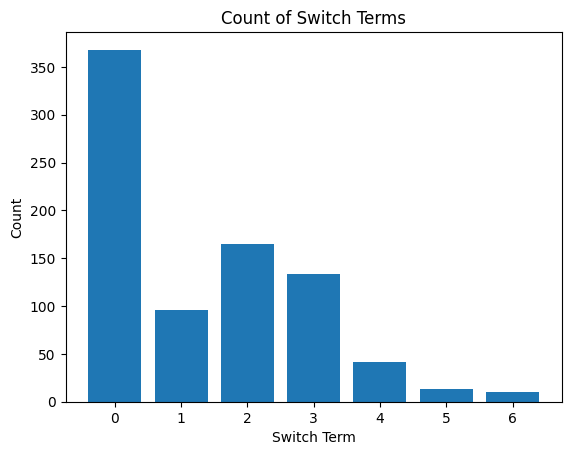

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Switch Term' is the column you want to count
# and 'changed_majors' is your DataFrame
# Replace 'Switch Term' with the actual column name if different
# Replace 'changed_majors' with your actual DataFrame variable name

# Example:
# changed_majors = pd.read_csv('your_data.csv')

# Count the occurrences of each value in 'Switch Term'
switch_term_counts = changed_majors['Switch Term'].value_counts()

# Create a bar graph
plt.bar(switch_term_counts.index, switch_term_counts.values)

# Adding labels and title
plt.xlabel('Switch Term')
plt.ylabel('Count')
plt.title('Count of Switch Terms')

# Display the plot
plt.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Assuming your DataFrame is named 'changed_majors'
# Exclude the first record for each Student ID
changed_majors_filtered = changed_majors.groupby('Student ID').apply(lambda group: group.iloc[1:]).reset_index(drop=True)

# Create a subplot for each Major 1
majors = changed_majors_filtered['Major 1'].unique()

# Create subplots
fig = sp.make_subplots(rows=len(majors), cols=1, subplot_titles=majors)

# Populate each subplot
for i, major in enumerate(majors):
    data = changed_majors_filtered[changed_majors_filtered['Major 1'] == major]

    # Create bar plot for counts of "Switch Term" by Major 1
    trace = go.Bar(x=data['Switch Term'].value_counts().index,
                   y=data['Switch Term'].value_counts().values,
                   marker_color='steelblue',
                   name=major)

    fig.add_trace(trace, row=i+1, col=1)

# Update layout
fig.update_layout(height=400*len(majors), title_text='Counts of Switch Term by Major 1', showlegend=False)

# Show the interactive plot
fig.show()